标注工具

## 预处理

In [1]:
import os
import pandas as pd
from utils import dropun, pre_process, Pdf2Txt, has_alpha
from wencai.util.utils import check_output

pdf = os.listdir('core_qmof_pdf')

In [2]:
df = dropun(pd.read_csv('../Merge/core_qmof704.csv'))
dois = set(df['doi'])
df = df.set_index('doi')

In [3]:
# dest = 'core_qmof_txt'
dest = 'core_qmof_html'
suffix = '.html'

lis = []  # 在dest文件夹下存在的txt/html

for f in os.listdir(dest):
    d = dest + '/' + f
    name = f[:-len(suffix)]
    if name in dois:
        lis.append(name)

In [4]:
len(lis)

697

In [5]:
valid = []
for doi in dois:
    if doi + suffix in os.listdir(dest):
        with open(dest + '/' + doi + suffix, 'r', encoding='utf-8') as f:
            s = f.read()
        df.loc[doi, suffix[1:]] = s
        valid.append(doi)
    else:
        print(doi)

cg401935z
acs.inorgchem.5b01364
1521-3749(200102)627:2%3c131::aid-zaac131%3e3.3.co;2-r
(sici)1521-3773(19990917)38:18%3c2730::aid-anie2730%3e3.3.co;2-0
cg401601d
acs.inorgchem.6b01845
(sici)1521-3773(19990115)38:1


In [6]:
common_list = pd.read_csv('common_list.csv', encoding="gbk").drop(list(range(32,44)))
metal = common_list['金属前驱体名称']

def transform(s):
    return ''.join(filter(str.isalnum, s.lower())) 

In [7]:
import numpy as np
all_field = []
for col in common_list.columns:
    field = set(common_list[col])
    field.discard(np.NAN)
    all_field += field

直接完全匹配金属前驱体名称，只有两篇出现。为了得到更全面的数据，不妨使用所有字段进行匹配

## 标注工具——brat

采取博客中提到的方案一：http://118.190.210.193:9005/blog/post/admin/61308c94be06537989000001
        
1. 手动转换为txt：由于直接转换为txt或者转为html之后再转txt可能出现以下格式问题，因此必须先转成docx，再转为txt

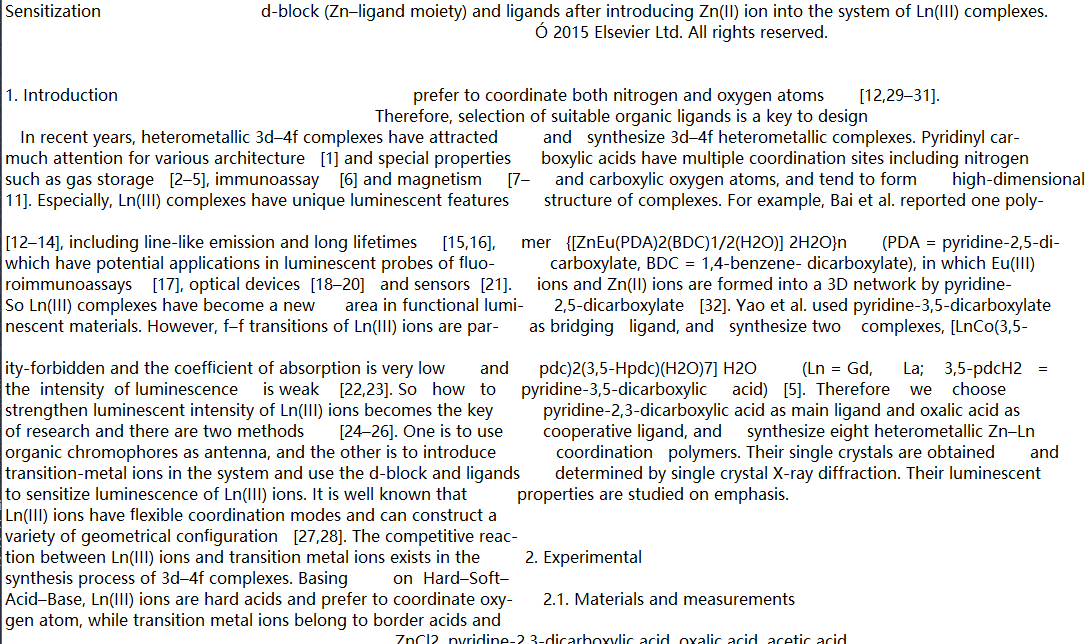

2. 预处理

In [8]:
os.makedirs('core_qmof_txt', exist_ok=True)

for file in os.listdir('core_qmof_word'):
    try:
        cmd = f'wc.util totxt core_qmof_word/{file} -o core_qmof_txt_word/{file[:-5]}.txt -p'
        check_output(cmd.split())
    except:
        print(file)
        os.remove(f'core_qmof_word/{file}')

## 预高亮

已经有了标注数据（见http://118.190.210.193:9005/blog/post/admin/751d75f58383 > 小范围测试），处理数据得到不重不漏的清单，将清单添加到已有表格之后，可以将清单上的实体在文中提前高亮出来

### 通过匹配替换方式

In [9]:
html_dest = 'core_qmof_html_dest/'
os.makedirs(html_dest, exist_ok=True)

pre = '<font style="background: %s;color: black">'
post = '</font>'

color = {
    '金属前驱体名称':'yellow',
    '金属分子式':'yellow',
    '有机配体名称':'LightSkyBlue ',
    '有机配体分子式':'LightSkyBlue ',
#     '配体简称':'cyan',
    '溶剂名称':'LightPink',
#     '溶剂分子式':'LightPink',
    '添加剂名称':'LightGreen',
    '添加剂化学式':'LightGreen'
}

def get_color(s):
    return color.get(s, 'purple')

In [10]:
def note(doi):
    """使用match函数定义的忽略大小写匹配方法，对doi对应html文件进行高亮"""
    s = df.loc[doi, suffix[1:]].lower()
    c = 0
    for col in common_list.columns:
        if col in color.keys():
            field = set(common_list[col])
            field.discard(np.NAN)
            for m in field:
                c += s.count(m)
                s = s.replace(m, pre % get_color(col) + m + post)
    with open(html_dest + doi + '.html', 'w') as f:
        f.write(s)
    return c

In [11]:
for v in valid[:20]:
    print(v, note(v))

c4ra02942a 0
j.molstruc.2011.05.013 0
c3ce27023h 0
ejic.200400960 0
15533174.2013.791851 0
ic0106017 0
c1cc12763b 0
ic302010e 3
anie.201410459 1
ic301857h 2
jp302356q 6
ic060543v 0
s10904-011-9641-0 0
nchem.684 0
c3ce00009e 0
ic0605266 0
b009455m 0
c6ta10152f 1
j.cnki.0254-5861.2011-1072 0
acs.inorgchem.5b00214 0
zaac.201400388 2
15533174.2016.1158187 0
j.micromeso.2011.12.035 3
b919243c 0
anie.200600333 0
cg100568a 0
j.inoche.2008.05.030 0
c2dt31394d 0
acs.cgd.6b01484 0
j.cnki.0254-5861.2011-1180 0
j.molstruc.2015.08.068 0
cg501324r 0
j.solidstatesciences.2004.03.007 0
ic0301268 0
j.inoche.2005.09.008 0
c1dt10901d 1
j.inoche.2015.03.019 0
15533174.2013.797462 0
ic400940w 0
cm051829l 0
j.molstruc.2006.11.065 0
c2nj20888a 0
acs.jpcc.5b02359 0
s0020-1693(02)00705-3 0
c2ce06345j 0
acs.inorgchem.6b00814 4
j.ica.2016.05.002 0
ic2015463 0
j.inoche.2013.01.023 0
cg8010629 1
j.electacta.2016.08.069 0
ejic.200300813 0
c3ce41083h 0
cg9011857 2
a909754f 0
ejic.200600198 1
ejic.201100227 0
c2dt318

c0dt00999g 0
ic101412p 5
s10904-014-0045-9 1
cl.2010.878 0
b925546j 0
b909772d 0
c3cc45689g 2
c0nj00631a 1
c4ra07128j 2
c4ce00093e 1
b714160b 3
s1600536800018833 0
zaac.201500028 0
ic801221r 0
c5nj01229e 2
j.inoche.2014.04.029 0
c5ra15937g 0
00958972.2016.1150458 2
cg4018163 11
c2ce26165k 3
acs.cgd.5b00083 0
ncrs.2001.216.14.139 0
acs.inorgchem.5b02340 0
ic401657d 0
j.snb.2017.04.151 0
s11426-011-4321-z 0
00958972.2016.1180371 1
j.jssc.2012.04.003 0
s0022476616020244 4
j.molstruc.2015.02.054 0
c3ce42048e 0
ic701628f 0
j.crci.2004.07.003 0
c1cc10829h 0
zaac.201400024 0
anie.200806039 0
acs.inorgchem.5b02200 0
anie.200906322 0
ja710973k 1
cg200350j 5
j.inoche.2012.05.038 0
j.jssc.2016.05.005 0
nature15732 0
ejic.200501146 0
acs.inorgchem.5b00110 0
j.ica.2010.06.045 0
b904387j 5
asia.200600113 0
c005228k 0
j.mencom.2016.05.010 0
00958972.2014.904042 2
b708389k 2
anie.201000094 0
c5dt04759e 0
s11426-011-4347-2 4
s2053229615000698 0
c3cc45310c 0
acs.cgd.6b00258 0
c0dt00390e 0
ja045123o 2
cg

如果采用完全匹配的方式，会有以下问题：
1. 因为没有忽略大小写，从而匹配的数量会远低于期望值
2. 图片采用16进制编码的形式存在于html中，如果直接匹配，会同时替换掉图片内容
3. 配体简称、溶剂分子式的匹配会匹配到关键字的一半

解决方法：
1. 在高亮匹配时采用类似Notepad编辑器的功能：忽略大小写，词组匹配
2. 仅匹配html中text的部分

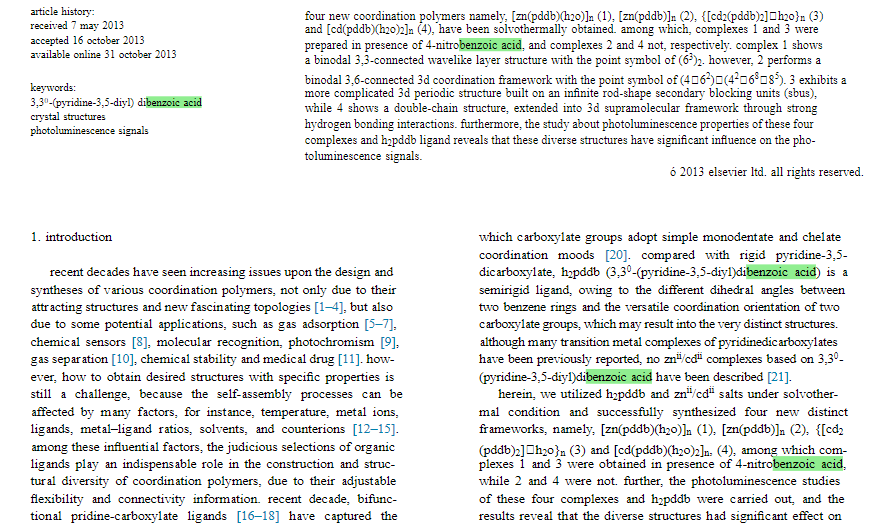

## 添加关键信息

![image-20211006105252751](https://gitee.com/sun__ye/gallery/raw/master/img2/20211006105254.png)

讨论得到的经验是：预高亮这种方式似乎并不会带来辅助效果，甚至还会阻碍。但是CCDC上的“成分名”信息可能包含MOF配体+金属+溶剂信息。并且3D模型也能指导标注人员高效获取信息。

从CCDC上爬取“成分名”及网页

In [12]:
html_info = 'core_qmof_html_info/'

In [13]:
df = dropun(pd.read_csv("../Webber/CoRE_MOFs.csv"))